<a href="https://colab.research.google.com/github/StephJones87/steph_pyladies/blob/main/pyladies_clinical_trials_API_and_graph_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import requests
from datetime import datetime
import matplotlib.pyplot as plt

In [18]:
# setting the variables
api_url = 'https://clinicaltrials.gov/api/v2/studies?'

#condition = 'polycystic ovary syndrome'
#condition = 'endometriosis'
# condition = 'menopause'
condition = 'adenomyosis'

query_parameters = {
    "query.cond": condition,
    "fields": "ProtocolSection",
    "pageSize": '1000',
    "format": "json"
}

In [19]:
def get_clinical_trial_info(api_endpoint, params={}):
  response = requests.get(api_endpoint, params=params)
  data = response.json()
  return data

In [20]:
def normalize_date(date_str):
  date_formats = ["%Y-%m-%d", "%d/%m/%Y", "%Y-%m"]
  for format_str in date_formats:
    date_obj = datetime.strptime(date_str, format_str)
    return date_obj.strftime("%Y-%m-%d")

In [21]:
def extract_dates_from_data(data):
  dates_list = []
  for study in data['studies']:
    normalized_date = normalize_date(study['protocolSection']['statusModule']['studyFirstSubmitDate'])
    dates_list.append(normalized_date)
  return dates_list

In [22]:
def aggregate_dates_by_year(date_list):
  date_groups = {}
  for date_str in date_list:
    year_str = date_str[:4]
    if year_str not in date_groups:
      date_groups[year_str] = 0
    date_groups[year_str] += 1
  return date_groups

In [23]:
def plot_bar_chart(data_dict, x_label, y_label, title):
  categories = list(data_dict.keys())
  counts = list(data_dict.values())

  # Generate a list of different colors for each bar
  colors = [
    '#FFEBEB', '#FFE5E5', '#FFDFDF', '#FFD9D9', '#FFD3D3',
    '#FFCDCD', '#FFC7C7', '#FFC1C1', '#FFBBBB', '#FFB5B5',
    '#FFAFAF', '#FFA9A9', '#FFA3A3', '#FF9D9D', '#FF9797',
    '#FF9191', '#FF8B8B', '#FF8585', '#FF7F7F', '#FF7979',
    '#FF7373', '#FF6D6D', '#FF6767', '#FF6161', '#FF5B5B',
    '#FF5555', '#FF4F4F', '#FF4949', '#FF4343', '#FF3D3D']

  # Create a dark background style
  plt.style.use('dark_background')

  # Create a bar graph with custom colors and styling
  plt.figure(figsize=(10, 6))
  plt.bar(categories, counts, color=colors[:len(categories)])
  plt.xlabel(x_label, fontsize=14, color='white')
  plt.ylabel(y_label, fontsize=14, color='white')
  plt.title(f'Clinical trials listed per year on ClinicalTrials.gov api condition: {title}', fontsize=16, color='white')
  plt.xticks(rotation=45, fontsize=12, color='white')  # Rotate x-axis labels for readability

  # Add a grid for a cleaner look
  plt.grid(axis='y', linestyle='--', alpha=0.7)

  # Display the graph
  plt.tight_layout()
  plt.show()

Year: 2005, Count: 4
Year: 2006, Count: 1
Year: 2010, Count: 4
Year: 2011, Count: 2
Year: 2012, Count: 3
Year: 2013, Count: 6
Year: 2014, Count: 8
Year: 2015, Count: 5
Year: 2016, Count: 5
Year: 2017, Count: 6
Year: 2018, Count: 9
Year: 2019, Count: 10
Year: 2020, Count: 7
Year: 2021, Count: 11
Year: 2022, Count: 4
Year: 2023, Count: 5


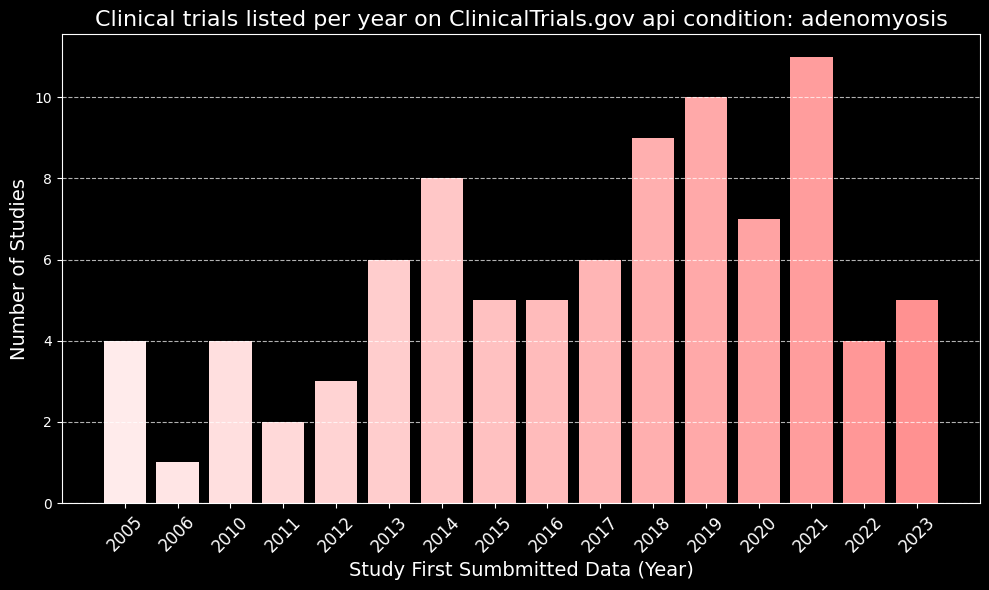

In [24]:
api_data = get_clinical_trial_info(api_url, query_parameters)
dates_data = extract_dates_from_data(api_data)
aggregated_data = aggregate_dates_by_year(dates_data)
sorted_year_counts = dict(sorted(aggregated_data.items()))  # Optional: Sort by year

for year, count in sorted_year_counts.items():
  print(f"Year: {year}, Count: {count}")

xlabel = "Study First Sumbmitted Data (Year)"
ylabel = "Number of Studies"
title = condition
plot_bar_chart(sorted_year_counts, xlabel, ylabel, title)